In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from unifin import setRFM


In [2]:
dataset=setRFM()

El numero de filas de este dataset es de:998


# CONCLUSION

In [3]:
dataset.head()

,Id,Date,Frecuency,Money,R,F,M
0,998,20130323,4,195.0,1.0,2.0,2.0
1,997,20130324,4,553.0,1.0,2.0,3.0
2,996,20130325,7,610.0,1.0,4.0,4.0
3,995,20130326,4,538.0,1.0,2.0,3.0
4,994,20130327,8,47.0,1.0,4.0,1.0


In [8]:
d=dataset['F'].value_counts().to_dict()
r_frame=pd.DataFrame([d], columns=d.keys())
r_frame

,5.0,4.0,1.0,3.0,2.0
0,215,210,201,186,186


[]

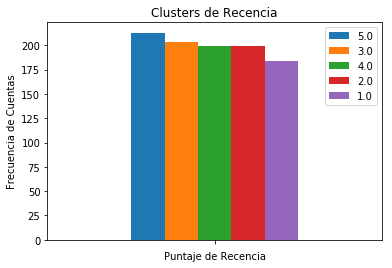

In [7]:
ax=r_frame.plot(kind='bar')
ax.set_title('Clusters de Recencia')
ax.set_xlabel('Puntaje de Recencia')
ax.set_ylabel('Frecuencia de Cuentas')
ax.set_xticklabels('')